In [ ]:
!pip install paddleocr
!pip install paddlepaddle

In [ ]:
import tensorflow as tf
import requests
import cv2
import os
import csv
import numpy as np
import pandas as pd
import huggingface_hub
from huggingface_hub import Repository
from datetime import datetime
import scipy.ndimage.interpolation as inter
# import easyocr
# import datasets
# from datasets import load_dataset, Image
from PIL import Image as PILImage  # Avoids conflict with datasets' Image
from paddleocr import PaddleOCR
# from save_data import flag

"""
Paddle OCR
"""
def ocr_with_paddle(img):
    finaltext = ''
    ocr = PaddleOCR(lang='en', use_angle_cls=True)
    result = ocr.ocr(img)

    for i in range(len(result[0])):
        text = result[0][i][1][0]
        finaltext += ' ' + text
    return finaltext

def process_resumes(resume_paths):
    """
    Reads and performs OCR on one or more resume images.

    Parameters:
    - resume_paths: List of paths to resume images or a single image path

    Returns:
    - Dictionary with each file's path as the key and extracted text as the value.
    """
    ocr_results = {}
    ocr = PaddleOCR(lang='en', use_angle_cls=True)

    # If single resume path is provided, make it a list for uniform processing
    if isinstance(resume_paths, str):
        resume_paths = [resume_paths]

    for path in resume_paths:
        try:
            img = cv2.imread(path)
            result = ocr.ocr(img)

            finaltext = ''
            for i in range(len(result[0])):
                text = result[0][i][1][0]
                finaltext += ' ' + text

            ocr_results[path] = finaltext

        except Exception as e:
            print(f"Error processing {path}: {e}")

    return ocr_results

# Example usage:
#resume_paths = ["/content/WhatsApp Image 2024-11-13 at 15.38.43_4c1d1710.jpg"]  # Replace with actual paths to resumes
#ocr_texts = process_resumes(resume_paths)

# Displaying the OCR results
#for path, text in ocr_texts.items():
 #   print(f"Text from {path}:\n{text}\n")


In [1]:
!pip install pymupdf

In [2]:
!pip install gradio

In [3]:
!pip install --upgrade gradio

In [ ]:
import fitz  # PyMuPDF
import os
from google.colab import files

def extract_text_from_pdf(pdf_path):
    """Extract text from each page of a PDF file."""
    text = ""
    with fitz.open(pdf_path) as pdf:
        for page_num in range(pdf.page_count):
            page = pdf[page_num]
            text += page.get_text("text") + "\n"
    return text

def process_pdf_resumes(pdf_files):
    """Process uploaded PDF resumes and save extracted text in Colab."""
    output_data = {}
    output_folder = "resume_texts"
    os.makedirs(output_folder, exist_ok=True)

    for pdf_name, pdf_file in pdf_files.items():
        # Save the uploaded file locally
        local_path = f"./{pdf_name}"
        with open(local_path, "wb") as f:
            f.write(pdf_file)

        # Extract text from PDF
        resume_text = extract_text_from_pdf(local_path)

        # Save extracted text to a file
        base_filename = os.path.splitext(pdf_name)[0]
        output_file_path = os.path.join(output_folder, f"{base_filename}_text.txt")

        with open(output_file_path, "w", encoding="utf-8") as f:
            f.write(resume_text)

        # Store the result for display
        output_data[base_filename] = {
            "file_name": pdf_name,
            "extracted_text": resume_text,
            "output_file": output_file_path
        }

    return output_data

# Colab-specific file upload
uploaded_files = files.upload()  # Upload PDFs here

# Process the uploaded PDF resumes
results = process_pdf_resumes(uploaded_files)

# Display the results
for name, data in results.items():
    print(f"Processed file: {data['file_name']}")
    print(f"Extracted text:\n{data['extracted_text']}\n")
    print(f"Saved output file: {data['output_file']}")


Saving Latest_resume_2.pdf to Latest_resume_2.pdf
Processed file: Latest_resume_2.pdf
Extracted text:
ABHIJEET KAITHWAS
 +91-8850429837 || abhijeet.kaithwas13@gmail.com || LinkedIn :  +91-88
50429837 || abhijeet.kaithwas13@gmail.com || LinkedIn : [Link] Github :
 [Link] 
Leetco
de : [Link]
KT nagar, Nagpur - 440013, India 
SKILLS
EXPERIENCE AND PROJECTS
Programming Languages : C++, C, Java, Python. 
Frameworks : Tensorflow, Keras, Scikit-Learn, Pytorch.
Data Visualization Tool : Power BI.
Docker : Build docker images and containers for training deep learning models.
Soft Skills : Strong interpersonal skills, Presentation skills
Detectron 2 model for all the objectives : Multi-label classification, localization and segmentation.
DSRL GLobal                                                                                                      June-Sep 2024
Research and Development intern
Worked as a team member of the computer vision and robotics perception group.
Worked as a team member o

In [ ]:
pip install PyPDF2


Tf-Idf ,we are using


In [ ]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive # Import drive

# Mount Google Drive
drive.mount('/content/drive') # Mount drive
import PyPDF2

# Load job description
job_description = """
Location: [Company Location or Remote Option]
Type: Internship (3-6 months)
Reports to: Machine Learning Engineer / Data Science Team

About the Role:
We’re looking for a passionate and dedicated Machine Learning Intern to join our team. In this role, you’ll work closely with experienced data scientists and machine learning engineers on real-world projects, helping to build and test machine learning models that support our products and services. This internship is designed for those new to the field who are eager to learn and grow in a collaborative environment.

Responsibilities:
Assist in data preparation and processing, including data cleaning, normalization, and feature extraction.
Support the team in building, training, and evaluating machine learning models.
Collaborate with software engineers to integrate models into production environments.
Conduct research to understand and implement current trends and techniques in machine learning.
Document processes, model parameters, and experiment results.
Participate in team meetings and contribute ideas to enhance project outcomes.
"""

# Load resumes from the `resume_texts` folder
resume_texts_folder = "/content/drive/MyDrive/Resume_Data"
resume_files = [os.path.join(resume_texts_folder, f) for f in os.listdir(resume_texts_folder) if f.endswith(".pdf")]

# Function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() or ""
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text

# Read resumes into a list
resumes = [extract_text_from_pdf(resume_file) for resume_file in resume_files]

# Combine job description with resumes for vectorization
documents = [job_description] + resumes

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Calculate cosine similarity between job description and each resume
job_description_vector = tfidf_matrix[0]  # The first vector is the job description
resume_vectors = tfidf_matrix[1:]  # The rest are resumes

similarities = cosine_similarity(job_description_vector, resume_vectors).flatten()

# Rank resumes based on similarity
ranked_resumes = sorted(zip(resume_files, similarities), key=lambda x: x[1], reverse=True)

# Display results
print("Ranked Resumes Based on Similarity:\n")
for idx, (resume_file, score) in enumerate(ranked_resumes, start=1):
    print(f"{idx}. Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ranked Resumes Based on Similarity:

1. Resume: 12.pdf, Similarity Score: 0.2365
2. Resume: 4.pdf, Similarity Score: 0.1643
3. Resume: 21.pdf, Similarity Score: 0.1431
4. Resume: 7.pdf, Similarity Score: 0.1424
5. Resume: 17.pdf, Similarity Score: 0.1327
6. Resume: 6.pdf, Similarity Score: 0.1284
7. Resume: 18..pdf, Similarity Score: 0.1221
8. Resume: 19.pdf, Similarity Score: 0.1136
9. Resume: 27.pdf, Similarity Score: 0.1052
10. Resume: 11.pdf, Similarity Score: 0.1031
11. Resume: 10.pdf, Similarity Score: 0.0999
12. Resume: 15.pdf, Similarity Score: 0.0930
13. Resume: 13.pdf, Similarity Score: 0.0848
14. Resume: 25.pdf, Similarity Score: 0.0737
15. Resume: 22.pdf, Similarity Score: 0.0677
16. Resume: 24.pdf, Similarity Score: 0.0668
17. Resume: 16.pdf, Similarity Score: 0.0656
18. Resume: 8.pdf, Similarity Score: 0.0533
19. Resume: 14.pdf, Similarity Score

for getting array of prediction resume

In [ ]:
# Existing Code: Ranked Resumes Based on Similarity
ranked_resumes = sorted(zip(resume_files, similarities), key=lambda x: x[1], reverse=True)

# Determine the number of resumes
num_resumes = len(ranked_resumes)

# Create an array of zeros
resume_array = np.zeros(num_resumes, dtype=int)

# Extract top 5 resume indices
top_5_resumes = [int(os.path.basename(resume_file).split(".")[0]) for resume_file, _ in ranked_resumes[:5]]

# Set corresponding indices in the array to 1
for index in top_5_resumes:
    if index < num_resumes:  # Ensure index is within bounds
        resume_array[index-1] = 1

# Display the results
print("Array indicating top 5 resumes:\n", resume_array)

# Display ranked resumes for reference
print("\nRanked Resumes Based on Similarity:\n")
for idx, (resume_file, score) in enumerate(ranked_resumes, start=1):
    print(f"{idx}. Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")


Array indicating top 5 resumes:
 [0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]

Ranked Resumes Based on Similarity:

1. Resume: 12.pdf, Similarity Score: 0.2365
2. Resume: 4.pdf, Similarity Score: 0.1643
3. Resume: 21.pdf, Similarity Score: 0.1431
4. Resume: 7.pdf, Similarity Score: 0.1424
5. Resume: 17.pdf, Similarity Score: 0.1327
6. Resume: 6.pdf, Similarity Score: 0.1284
7. Resume: 18..pdf, Similarity Score: 0.1221
8. Resume: 19.pdf, Similarity Score: 0.1136
9. Resume: 27.pdf, Similarity Score: 0.1052
10. Resume: 11.pdf, Similarity Score: 0.1031
11. Resume: 10.pdf, Similarity Score: 0.0999
12. Resume: 15.pdf, Similarity Score: 0.0930
13. Resume: 13.pdf, Similarity Score: 0.0848
14. Resume: 25.pdf, Similarity Score: 0.0737
15. Resume: 22.pdf, Similarity Score: 0.0677
16. Resume: 24.pdf, Similarity Score: 0.0668
17. Resume: 16.pdf, Similarity Score: 0.0656
18. Resume: 8.pdf, Similarity Score: 0.0533
19. Resume: 14.pdf, Similarity Score: 0.0529
20. Resume: 23.pdf, Si

Confusion matrix


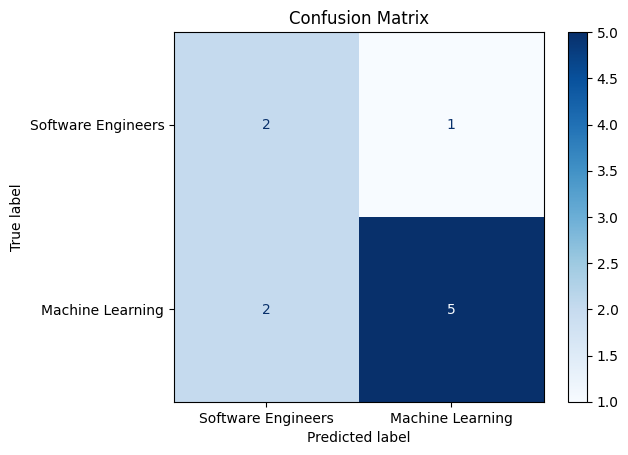

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data
actual = [1, 1, 1, 1, 1, 0, 0, 0, 1, 1]
predicted = [1, 1, 1, 1, 1, 0, 0, 1, 0, 0]

# Construct the confusion matrix
cm = confusion_matrix(actual, predicted)

# Labels for the matrix
labels = ["Software Engineers", "Machine Learning"]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!gunzip cc.en.300.bin.gz

gzip: cc.en.300.bin.gz: No such file or directory


In [ ]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
# !gunzip cc.en.300.bin.gz

# import fasttext
# import numpy as np
# import os
# from sklearn.metrics.pairwise import cosine_similarity

# # Load FastText pre-trained word vectors (English)
# ft = fasttext.load_model('cc.en.300.bin')  # The model is now in the current directory

# def get_sentence_embedding(sentence, model):
#     """Generate a sentence embedding by averaging the FastText word embeddings"""
#     words = sentence.split()  # Tokenize sentence into words
#     word_embeddings = [model.get_word_vector(word) for word in words]
#     sentence_embedding = np.mean(word_embeddings, axis=0)  # Average word embeddings
#     return sentence_embedding

# def process_resumes_with_fasttext(job_description, resume_texts_folder):
#     """Process resumes and calculate cosine similarity with job description"""
#     # Get the embedding for the job description
#     job_description_embedding = get_sentence_embedding(job_description, ft)

#     resume_files = [os.path.join(resume_texts_folder, f) for f in os.listdir(resume_texts_folder) if f.endswith(".txt")]
#     similarities = []

#     for resume_file in resume_files:
#         with open(resume_file, "r", encoding="utf-8") as f:
#             resume_text = f.read()
#             # Get the embedding for the resume
#             resume_embedding = get_sentence_embedding(resume_text, ft)

#             # Calculate cosine similarity
#             similarity_score = cosine_similarity([job_description_embedding], [resume_embedding])[0][0]
#             similarities.append((resume_file, similarity_score))

#     # Rank resumes based on similarity
#     ranked_resumes = sorted(similarities, key=lambda x: x[1], reverse=True)

#     # Display results
#     for resume_file, score in ranked_resumes:
#         print(f"Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")

# # Example usage
# job_description = """
# Location: [Company Location or Remote Option]
# Type: Internship (3-6 months)
# Reports to: Machine Learning Engineer / Data Science Team

# About the Role:
# We’re looking for a passionate and dedicated Machine Learning Software Intern to join our team. In this role, you’ll work closely with experienced data scientists and machine learning engineers on real-world projects, helping to build and test machine learning models that support our products and services. This internship is designed for those new to the field who are eager to learn and grow in a collaborative environment.

# Responsibilities:
# Assist in data preparation and processing, including data cleaning, normalization, and feature extraction.
# Support the team in building, training, and evaluating machine learning models.
# Collaborate with software engineers to integrate models into production environments.
# Conduct research to understand and implement current trends and techniques in machine learning.
# Document processes, model parameters, and experiment results.
# Participate in team meetings and contribute ideas to enhance project outcomes.
# """  # Use your full job description here

# resume_texts_folder = "resume_texts"  # Folder containing the resumes (already extracted text)

# process_resumes_with_fasttext(job_description, resume_texts_folder)


--2024-11-13 11:35:32--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.39.6, 13.249.39.25, 13.249.39.82, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249.39.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz.1’

cc.en.300.bin.gz.1  100%[===================>]   4.19G   174MB/s    in 31s     

2024-11-13 11:36:03 (139 MB/s) - ‘cc.en.300.bin.gz.1’ saved [4503593528/4503593528]

gzip: cc.en.300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten
Resume: cv (1)_text.txt, Similarity Score: 0.8316


fasttext updated

In [ ]:
!pip install fasttext
!wget https://dl.fbaipublicfiles.

--2024-12-03 18:28:39--  https://dl.fbaipublicfiles./
Resolving dl.fbaipublicfiles. (dl.fbaipublicfiles.)... failed: Name or service not known.
wget: unable to resolve host address ‘dl.fbaipublicfiles.’


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

--2024-12-03 18:27:04--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.138.94.124, 108.138.94.128, 108.138.94.118, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.138.94.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz.2’

cc.en.300.bin.gz.2  100%[===================>]   4.19G   213MB/s    in 29s     

2024-12-03 18:27:34 (147 MB/s) - ‘cc.en.300.bin.gz.2’ saved [4503593528/4503593528]

gzip: cc.en.300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
import fasttext
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive
import PyPDF2

# # Mount Google Drive
# drive.mount('/content/drive')

# Path to the folder containing resume PDF files in Google Drive
resume_texts_folder = "/content/drive/MyDrive/Resume_Data"  # Update with your Google Drive folder path

# Load FastText pre-trained word vectors (English)
ft = fasttext.load_model('cc.en.300.bin')  # The model is now in the current directory

# Function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() or ""
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text

# Function to calculate sentence embedding
def get_sentence_embedding(sentence, model):
    """Generate a sentence embedding by averaging the FastText word embeddings."""
    words = sentence.split()  # Tokenize sentence into words
    word_embeddings = [model.get_word_vector(word) for word in words]
    sentence_embedding = np.mean(word_embeddings, axis=0)  # Average word embeddings
    return sentence_embedding

def process_resumes_with_fasttext(job_description, resume_texts_folder):
    """Process resumes (PDFs), calculate cosine similarity with job description, and rank them."""
    # Get the embedding for the job description
    job_description_embedding = get_sentence_embedding(job_description, ft)

    # Load resume PDF files from the folder
    resume_files = [os.path.join(resume_texts_folder, f) for f in os.listdir(resume_texts_folder) if f.endswith(".pdf")]

    # Extract text and calculate similarity scores
    similarities = []
    for resume_file in resume_files:
        resume_text = extract_text_from_pdf(resume_file)
        if resume_text.strip():  # Ensure we have extracted text
            resume_embedding = get_sentence_embedding(resume_text, ft)
            similarity_score = cosine_similarity([job_description_embedding], [resume_embedding])[0][0]
            similarities.append((resume_file, similarity_score))
        else:
            print(f"No text extracted from {resume_file}. Skipping.")

    # Rank resumes based on similarity
    ranked_resumes = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Create an array where the top 5 resumes have a value of 1 and the rest are 0
    top_resumes_array = np.zeros(len(ranked_resumes), dtype=int)
    for idx in range(min(5, len(ranked_resumes))):  # Ensure we handle fewer than 5 resumes gracefully
        top_resumes_array[idx] = 1

    # Display results
    print("Ranked Resumes Based on Similarity:\n")
    for idx, (resume_file, score) in enumerate(ranked_resumes, start=1):
        print(f"{idx}. Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")

    # Print the top resumes array
    print("\nTop Resumes Array:", top_resumes_array)

# Example usage
job_description = """
Location: [Company Location or Remote Option]
Type: Internship (3-6 months)
Reports to: Machine Learning Engineer / Data Science Team

About the Role:
We’re looking for a passionate and dedicated Machine Learning Software Intern to join our team. In this role, you’ll work closely with experienced data scientists and machine learning engineers on real-world projects, helping to build and test machine learning models that support our products and services. This internship is designed for those new to the field who are eager to learn and grow in a collaborative environment.

Responsibilities:
Assist in data preparation and processing, including data cleaning, normalization, and feature extraction.
Support the team in building, training, and evaluating machine learning models.
Collaborate with software engineers to integrate models into production environments.
Conduct research to understand and implement current trends and techniques in machine learning.
Document processes, model parameters, and experiment results.
Participate in team meetings and contribute ideas to enhance project outcomes.
"""  # Use your full job description here

# Call the function
process_resumes_with_fasttext(job_description, resume_texts_folder)


Ranked Resumes Based on Similarity:

1. Resume: 28.pdf, Similarity Score: 0.9253
2. Resume: 6.pdf, Similarity Score: 0.9234
3. Resume: 20.pdf, Similarity Score: 0.9183
4. Resume: 12.pdf, Similarity Score: 0.9179
5. Resume: 10.pdf, Similarity Score: 0.9145
6. Resume: 7.pdf, Similarity Score: 0.9143
7. Resume: 9.pdf, Similarity Score: 0.9027
8. Resume: 3.pdf, Similarity Score: 0.9014
9. Resume: 5.pdf, Similarity Score: 0.9001
10. Resume: 16.pdf, Similarity Score: 0.8966
11. Resume: 13.pdf, Similarity Score: 0.8959
12. Resume: 25.pdf, Similarity Score: 0.8929
13. Resume: 21.pdf, Similarity Score: 0.8917
14. Resume: 29.pdf, Similarity Score: 0.8869
15. Resume: 22.pdf, Similarity Score: 0.8744
16. Resume: 31.pdf, Similarity Score: 0.8614
17. Resume: 24.pdf, Similarity Score: 0.8582
18. Resume: 11.pdf, Similarity Score: 0.8528
19. Resume: 27.pdf, Similarity Score: 0.8430
20. Resume: 2.pdf, Similarity Score: 0.8389
21. Resume: 19.pdf, Similarity Score: 0.8386
22. Resume: 17.pdf, Similarity Sc

In [ ]:
import fasttext
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive
import PyPDF2

# # Mount Google Drive
# drive.mount('/content/drive')

# Path to the folder containing resume PDF files in Google Drive
resume_texts_folder = "/content/drive/MyDrive/Resume_Data"  # Update with your Google Drive folder path

# Load FastText pre-trained word vectors (English)
ft = fasttext.load_model('cc.en.300.bin')  # The model is now in the current directory

# Function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() or ""
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text

# Function to calculate sentence embedding
def get_sentence_embedding(sentence, model):
    """Generate a sentence embedding by averaging the FastText word embeddings."""
    words = sentence.split()  # Tokenize sentence into words
    word_embeddings = [model.get_word_vector(word) for word in words]
    sentence_embedding = np.mean(word_embeddings, axis=0)  # Average word embeddings
    return sentence_embedding

def process_resumes_with_fasttext(job_description, resume_texts_folder):
    """Process resumes (PDFs), calculate cosine similarity with job description, and rank them."""
    # Get the embedding for the job description
    job_description_embedding = get_sentence_embedding(job_description, ft)

    # Load resume PDF files from the folder
    resume_files = [os.path.join(resume_texts_folder, f) for f in os.listdir(resume_texts_folder) if f.endswith(".pdf")]

    # Extract text and calculate similarity scores
    similarities = []
    for resume_file in resume_files:
        resume_text = extract_text_from_pdf(resume_file)
        if resume_text.strip():  # Ensure we have extracted text
            resume_embedding = get_sentence_embedding(resume_text, ft)
            similarity_score = cosine_similarity([job_description_embedding], [resume_embedding])[0][0]
            similarities.append((resume_file, similarity_score))
        else:
            print(f"No text extracted from {resume_file}. Skipping.")

    # Rank resumes based on similarity
    ranked_resumes_FT = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Display results
    print("Ranked Resumes Based on Similarity:\n")
    for idx, (resume_file, score) in enumerate(ranked_resumes_FT, start=1):
        print(f"{idx}. Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")

# Example usage
job_description = """
Location: [Company Location or Remote Option]
Type: Internship (3-6 months)
Reports to: Machine Learning Engineer / Data Science Team

About the Role:
We’re looking for a passionate and dedicated Machine Learning Software Intern to join our team. In this role, you’ll work closely with experienced data scientists and machine learning engineers on real-world projects, helping to build and test machine learning models that support our products and services. This internship is designed for those new to the field who are eager to learn and grow in a collaborative environment.

Responsibilities:
Assist in data preparation and processing, including data cleaning, normalization, and feature extraction.
Support the team in building, training, and evaluating machine learning models.
Collaborate with software engineers to integrate models into production environments.
Conduct research to understand and implement current trends and techniques in machine learning.
Document processes, model parameters, and experiment results.
Participate in team meetings and contribute ideas to enhance project outcomes.
"""  # Use your full job description here

# Call the function
process_resumes_with_fasttext(job_description, resume_texts_folder)


Ranked Resumes Based on Similarity:

1. Resume: 28.pdf, Similarity Score: 0.9253
2. Resume: 6.pdf, Similarity Score: 0.9234
3. Resume: 20.pdf, Similarity Score: 0.9183
4. Resume: 12.pdf, Similarity Score: 0.9179
5. Resume: 10.pdf, Similarity Score: 0.9145
6. Resume: 7.pdf, Similarity Score: 0.9143
7. Resume: 9.pdf, Similarity Score: 0.9027
8. Resume: 3.pdf, Similarity Score: 0.9014
9. Resume: 5.pdf, Similarity Score: 0.9001
10. Resume: 16.pdf, Similarity Score: 0.8966
11. Resume: 13.pdf, Similarity Score: 0.8959
12. Resume: 25.pdf, Similarity Score: 0.8929
13. Resume: 21.pdf, Similarity Score: 0.8917
14. Resume: 29.pdf, Similarity Score: 0.8869
15. Resume: 22.pdf, Similarity Score: 0.8744
16. Resume: 31.pdf, Similarity Score: 0.8614
17. Resume: 24.pdf, Similarity Score: 0.8582
18. Resume: 11.pdf, Similarity Score: 0.8528
19. Resume: 27.pdf, Similarity Score: 0.8430
20. Resume: 2.pdf, Similarity Score: 0.8389
21. Resume: 19.pdf, Similarity Score: 0.8386
22. Resume: 17.pdf, Similarity Sc

In [ ]:
# Existing Code: Ranked Resumes Based on Similarity
ranked_resumes_FT = sorted(zip(resume_files, similarities), key=lambda x: x[1], reverse=True)

# Determine the number of resumes
num_resumes = len(ranked_resumes_FT)

# Create an array of zeros
resume_array = np.zeros(num_resumes, dtype=int)

# Extract top 5 resume indices
top_5_resumes = [int(os.path.basename(resume_file).split(".")[0]) for resume_file, _ in ranked_resumes_FT[:5]]

# Set corresponding indices in the array to 1
for index in top_5_resumes:
    if index < num_resumes:  # Ensure index is within bounds
        resume_array[index-1] = 1

# Display the results
print("Array indicating top 5 resumes:\n", resume_array)

# Display ranked resumes for reference
print("\nRanked Resumes Based on Similarity:\n")
for idx, (resume_file, score) in enumerate(ranked_resumes_FT, start=1):
    print(f"{idx}. Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")


NameError: name 'resume_files' is not defined

for language conversion

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# Load pre-trained translation model and tokenizer
model_name = "Helsinki-NLP/opus-mt-mul-en"  # Supports multiple languages -> English
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Input text in various languages
texts = ["Indien, das siebtgrößte Land der Welt, ist bekannt für seine reiche Kultur, Geschichte und Vielfalt. Es ist die Heimat zahlreicher Religionen wie Hinduismus, Buddhismus, Jainismus und Sikhismus. Indien hat eine beeindruckende geografische Vielfalt, von den schneebedeckten Himalayas im Norden bis zu den tropischen Stränden im Süden. Seine Hauptstadt Neu-Delhi ist ein Zentrum für Politik und Geschichte, während Städte wie Mumbai für Wirtschaft und Bollywood bekannt sind. Indien ist auch berühmt für sein Essen, darunter Curry, Biryani und viele Gewürze, die weltweit beliebt sind. Trotz seiner rasanten wirtschaftlichen Entwicklung bleibt es eng mit seinen Traditionen und Bräuchen verbunden.",  # French
         "Ich bin Student.",   # German
         "Soy estudiante."]    # Spanish

# Tokenize and translate
translated = []
for text in texts:
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model.generate(**inputs)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    translated.append(translated_text)

print(translated)  # Output: ['I am a student.', 'I am a student.', 'I am a student.']


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


['India, the seventh largest country in the world, is known for its rich culture, history and diversity. It is home to many religions such as Hinduism, Buddhism, Jainism and Sikhism. India has an impressive geographical diversity, from the snow-covered Himalayas in the north to the tropical beaches in the south. Its capital New Delhi is a center for politics and history, while cities such as Mumbai are known for economics and Bollywood. India is also famous for its food, including Curry, Biryani and many threats that are popular in the world. Despite its growing economic development, it remains closely connected with its traditions and customs.', "I'm a student.", "I'm a student."]


In [ ]:
import os
from langdetect import detect
from transformers import MarianMTModel, MarianTokenizer

# Function to load translation model
def load_translation_model():
    model_name = "Helsinki-NLP/opus-mt-mul-en"  # Multi-language to English model
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    return tokenizer, model

# Function to translate text
def translate_to_english(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model.generate(**inputs)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_text

# Main function to process resumes
def process_resumes(input_folder):
    tokenizer, model = load_translation_model()

    for file_name in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file_name)

        # Only process text files
        if file_name.endswith(".txt"):
            with open(file_path, 'r', encoding='utf-8') as file:
                resume_text = file.read()

            # Detect language
            detected_language = detect(resume_text)
            print(f"Processing '{file_name}': Detected language = {detected_language}")

            # If not English, translate and replace
            if detected_language != 'en':
                print(f"Translating '{file_name}' to English...")
                translated_text = translate_to_english(resume_text, tokenizer, model)

                # Replace the old file with the translated text
                with open(file_path, 'w', encoding='utf-8') as file:
                    file.write(translated_text)

                print(f"'{file_name}' has been translated and updated.")
            else:
                print(f"'{file_name}' is already in English. Skipping...")

# Specify the folder containing resumes
input_folder = "path/to/your/resume/folder"  # Replace with your folder path
process_resumes(input_folder)


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=05c0399ece4bfadab9a21f6a6bc73d8b11aa3b951eb65fd92ce5a52725af39c0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [6]:
import os
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive  # Import drive
import PyPDF2

# Mount Google Drive
drive.mount('/content/drive')  # Mount drive

# Load the Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Load job description
job_description = """
Location: [Company Location or Remote Option]
Type: Internship (3-6 months)
Reports to: Machine Learning Engineer / Data Science Team

About the Role:
We’re looking for a passionate and dedicated Machine Learning Intern to join our team. In this role, you’ll work closely with experienced data scientists and machine learning engineers on real-world projects, helping to build and test machine learning models that support our products and services. This internship is designed for those new to the field who are eager to learn and grow in a collaborative environment.

Responsibilities:
Assist in data preparation and processing, including data cleaning, normalization, and feature extraction.
Support the team in building, training, and evaluating machine learning models.
Collaborate with software engineers to integrate models into production environments.
Conduct research to understand and implement current trends and techniques in machine learning.
Document processes, model parameters, and experiment results.
Participate in team meetings and contribute ideas to enhance project outcomes.
"""

# Load resumes from the resume_texts folder
resume_texts_folder = "/content/drive/MyDrive/Resume_Data"
resume_files = [os.path.join(resume_texts_folder, f) for f in os.listdir(resume_texts_folder) if f.endswith(".pdf")]

# Function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() or ""
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text

# Read resumes into a list
resumes = [extract_text_from_pdf(resume_file) for resume_file in resume_files]

# Combine job description with resumes for processing
documents = [job_description] + resumes

# Generate embeddings for all documents using SBERT
document_embeddings = model.encode(documents)

# The first embedding is the job description, and the rest are resumes
job_description_embedding = document_embeddings[0]
resume_embeddings = document_embeddings[1:]

# Calculate cosine similarity between the job description and each resume
similarities = cosine_similarity([job_description_embedding], resume_embeddings).flatten()

# Rank resumes based on similarity
ranked_resumes = sorted(zip(resume_files, similarities), key=lambda x: x[1], reverse=True)

# Display results
print("Ranked Resumes Based on Similarity:\n")
for idx, (resume_file, score) in enumerate(ranked_resumes, start=1):
    print(f"{idx}. Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Ranked Resumes Based on Similarity:

1. Resume: 12.pdf, Similarity Score: 0.6408
2. Resume: 6.pdf, Similarity Score: 0.5505
3. Resume: 7.pdf, Similarity Score: 0.5319
4. Resume: 4.pdf, Similarity Score: 0.5291
5. Resume: 11.pdf, Similarity Score: 0.4868
6. Resume: 25.pdf, Similarity Score: 0.4774
7. Resume: 15.pdf, Similarity Score: 0.4298
8. Resume: 17.pdf, Similarity Score: 0.4296
9. Resume: 24.pdf, Similarity Score: 0.4074
10. Resume: 10.pdf, Similarity Score: 0.3921
11. Resume: 1.pdf, Similarity Score: 0.3918
12. Resume: 23.pdf, Similarity Score: 0.3868
13. Resume: 29.pdf, Similarity Score: 0.3786
14. Resume: 19.pdf, Similarity Score: 0.3704
15. Resume: 26.pdf, Similarity Score: 0.3606
16. Resume: 21.pdf, Similarity Score: 0.3603
17. Resume: 14.pdf, Similarity Score: 0.3472
18. Resume: 18..pdf, Similarity Score: 0.3250
19. Resume: 16.pdf, Similarity Score: 0.3071
20. Resume: 30.pdf, Similarity Score: 0.2990
21. Resume: 13.pdf, Similarity Score: 0.2911
22. Resume: 3.pdf, Similarity 

In [2]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 16.3 MB/s eta 0:00:00


In [3]:
# Install Sentence-BERT library
# !pip install sentence-transformers

import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive
import PyPDF2
from sentence_transformers import SentenceTransformer

# Mount Google Drive (Uncomment if running on Google Colab)
drive.mount('/content/drive')

# Path to the folder containing resume PDF files in Google Drive
resume_texts_folder = "/content/drive/MyDrive/Resume_Data"  # Update with your Google Drive folder path

# Load the Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # This is a smaller, efficient model for embeddings

# Function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() or ""
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text

# Function to calculate sentence embedding using Sentence-BERT
def get_sentence_embedding(sentence, model):
    """Generate a sentence embedding using SBERT."""
    return model.encode(sentence)

def process_resumes_with_sbert(job_description, resume_texts_folder):
    """Process resumes (PDFs), calculate cosine similarity with job description, and rank them using SBERT."""
    # Get the embedding for the job description using SBERT
    job_description_embedding = get_sentence_embedding(job_description, model)

    # Load resume PDF files from the folder
    resume_files = [os.path.join(resume_texts_folder, f) for f in os.listdir(resume_texts_folder) if f.endswith(".pdf")]

    # Extract text and calculate similarity scores
    similarities = []
    for resume_file in resume_files:
        resume_text = extract_text_from_pdf(resume_file)
        if resume_text.strip():  # Ensure we have extracted text
            resume_embedding = get_sentence_embedding(resume_text, model)
            similarity_score = cosine_similarity([job_description_embedding], [resume_embedding])[0][0]
            similarities.append((resume_file, similarity_score))
        else:
            print(f"No text extracted from {resume_file}. Skipping.")

    # Rank resumes based on similarity
    ranked_resumes = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Create an array where the top 5 resumes have a value of 1 and the rest are 0
    top_resumes_array = np.zeros(len(ranked_resumes), dtype=int)
    for idx in range(min(5, len(ranked_resumes))):  # Ensure we handle fewer than 5 resumes gracefully
        top_resumes_array[idx] = 1

    # Display results
    print("Ranked Resumes Based on Similarity:\n")
    for idx, (resume_file, score) in enumerate(ranked_resumes, start=1):
        print(f"{idx}. Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")

    # Print the top resumes array
    print("\nTop Resumes Array:", top_resumes_array)

# Example usage
job_description = """
Location: [Company Location or Remote Option]
Type: Internship (3-6 months)
Reports to: Machine Learning Engineer / Data Science Team

About the Role:
We’re looking for a passionate and dedicated Machine Learning Software Intern to join our team. In this role, you’ll work closely with experienced data scientists and machine learning engineers on real-world projects, helping to build and test machine learning models that support our products and services. This internship is designed for those new to the field who are eager to learn and grow in a collaborative environment.

Responsibilities:
Assist in data preparation and processing, including data cleaning, normalization, and feature extraction.
Support the team in building, training, and evaluating machine learning models.
Collaborate with software engineers to integrate models into production environments.
Conduct research to understand and implement current trends and techniques in machine learning.
Document processes, model parameters, and experiment results.
Participate in team meetings and contribute ideas to enhance project outcomes.
"""  # Use your full job description here

# Call the function
process_resumes_with_sbert(job_description, resume_texts_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ranked Resumes Based on Similarity:

1. Resume: 12.pdf, Similarity Score: 0.6307
2. Resume: 6.pdf, Similarity Score: 0.5504
3. Resume: 7.pdf, Similarity Score: 0.5291
4. Resume: 4.pdf, Similarity Score: 0.5258
5. Resume: 11.pdf, Similarity Score: 0.4906
6. Resume: 25.pdf, Similarity Score: 0.4807
7. Resume: 15.pdf, Similarity Score: 0.4356
8. Resume: 17.pdf, Similarity Score: 0.4319
9. Resume: 24.pdf, Similarity Score: 0.4060
10. Resume: 10.pdf, Similarity Score: 0.3975
11. Resume: 1.pdf, Similarity Score: 0.3959
12. Resume: 23.pdf, Similarity Score: 0.3937
13. Resume: 29.pdf, Similarity Score: 0.3779
14. Resume: 19.pdf, Similarity Score: 0.3742
15. Resume: 21.pdf, Similarity Score: 0.3683
16. Resume: 26.pdf, Similarity Score: 0.3654
17. Resume: 14.pdf, Similarity Score: 0.3487
18. Resume: 18..pdf, Similarity Score: 0.3280
19. Resume: 16.pdf, Similarity Score

In [4]:
# Existing Code: Ranked Resumes Based on Similarity
ranked_resumes_FT = sorted(zip(resume_files, similarities), key=lambda x: x[1], reverse=True)

# Determine the number of resumes
num_resumes = len(ranked_resumes_FT)

# Create an array of zeros
resume_array = np.zeros(num_resumes, dtype=int)

# Extract top 5 resume indices
top_5_resumes = [int(os.path.basename(resume_file).split(".")[0]) for resume_file, _ in ranked_resumes_FT[:10]]

# Set corresponding indices in the array to 1
for index in top_5_resumes:
    if index < num_resumes:  # Ensure index is within bounds
        resume_array[index-1] = 1

# Display the results
print("Array indicating top 10 resumes:\n", resume_array)

# Display ranked resumes for reference
print("\nRanked Resumes Based on Similarity:\n")
for idx, (resume_file, score) in enumerate(ranked_resumes_FT, start=1):
    print(f"{idx}. Resume: {os.path.basename(resume_file)}, Similarity Score: {score:.4f}")



NameError: name 'resume_files' is not defined

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


actual_labels =[0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0]


cm = confusion_matrix(actual_labels, resume_array)

# Labels for the matrix (assumed to be binary: 0 for not relevant, 1 for relevant)
labels = ["Machine Learning", "Software Engineer"]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", cm)
